In [1]:
!pip install tables
!pip install xgboost
!pip install shap
!pip install cartopy

  Using cached tables-3.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Using cached numexpr-2.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (381 kB)
  Using cached blosc2-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.9 MB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Using cached xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl (200.3 MB)
  Using cached shap-0.42.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (547 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


In [30]:
# Autoreload packages that are modified
%load_ext autoreload
%autoreload 2


gt_id='contest_tmp2m' #'contest_tmp2m' or 'contest_precip'
target_horizon='56w' #'56w' or '34w'

from experiments_util import *
# Load functionality for fitting and predicting
from fit_and_predict import *
# Load functionality for evaluation
from skill import *
# Load stepwise utility functions
from stepwise_util import *
# Load xgboost functions
from xgboost_functional import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<div align="center">
    <h1><strong>Data</strong></h1>
</div>

In [4]:
rodeo_data=import_data()

Elapsed time= 159.8588261604309


In [5]:
#add CASM feature

data_with_casm=add_casm(rodeo_data)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

CASM Loading time= 70.19217586517334


In [6]:
#add elevation feature
data_with_elevation_and_casm=add_elevation(data_with_casm)

Elevation loading time= 11.772377729415894


<div align="center">
    <h1><strong>Model and predictions</strong></h1>
</div>

In [18]:
#compute predictions in both cases (with and without casm)
#this function takes approximately 7minutes to run
predictions_with_casm_and_elevation,predictions_with_casm,predictions_without_casm=compute_predictions(data_with_elevation_and_casm,gt_id,target_horizon)

['tmp2m_shift43', 'tmp2m_shift43_anom', 'tmp2m_shift86', 'tmp2m_shift86_anom', 'rhum_shift44', 'pres_shift44', 'nmme_wo_ccsm3_nasa', 'nmme0_wo_ccsm3_nasa', 'CASM']
2011 is done
Elapsed time for 2011=77.61125087738037
['tmp2m_shift43', 'tmp2m_shift43_anom', 'tmp2m_shift86', 'tmp2m_shift86_anom', 'rhum_shift44', 'pres_shift44', 'nmme_wo_ccsm3_nasa', 'nmme0_wo_ccsm3_nasa', 'CASM']
2012 is done
Elapsed time for 2012=77.62231659889221
['tmp2m_shift43', 'tmp2m_shift43_anom', 'tmp2m_shift86', 'tmp2m_shift86_anom', 'rhum_shift44', 'pres_shift44', 'nmme_wo_ccsm3_nasa', 'nmme0_wo_ccsm3_nasa', 'CASM']
2013 is done
Elapsed time for 2013=77.54200983047485
['tmp2m_shift43', 'tmp2m_shift43_anom', 'tmp2m_shift86', 'tmp2m_shift86_anom', 'rhum_shift44', 'pres_shift44', 'nmme_wo_ccsm3_nasa', 'nmme0_wo_ccsm3_nasa', 'CASM']
2014 is done
Elapsed time for 2014=77.05065441131592
['tmp2m_shift43', 'tmp2m_shift43_anom', 'tmp2m_shift86', 'tmp2m_shift86_anom', 'rhum_shift44', 'pres_shift44', 'nmme_wo_ccsm3_nasa',

In [31]:
#this cell enables to keep the predictions, so not to calculate them each time

hdf_directory = 'results/predictions'

hdf_filename = 'rodeo_only.h5'

hdf_filepath = os.path.join(hdf_directory, hdf_filename)


# Créez un fichier HDF et écrivez les DataFrames en utilisant leurs clés respectives
with pd.HDFStore(hdf_filepath, mode='w') as store:
    for dict_key, dict_value in predictions_without_casm.items():
        str_dict_key=str(dict_key)
        for df_key, df in dict_value.items():
            key = f'{str_dict_key}/{df_key}'
            store[key] = df

hdf_filename = 'rodeo_casm.h5'
            
hdf_filepath = os.path.join(hdf_directory, hdf_filename)


# Créez un fichier HDF et écrivez les DataFrames en utilisant leurs clés respectives
with pd.HDFStore(hdf_filepath, mode='w') as store:
    for dict_key, dict_value in predictions_with_casm.items():
        str_dict_key=str(dict_key)
        for df_key, df in dict_value.items():
            key = f'{str_dict_key}/{df_key}'
            store[key] = df
            
hdf_filename = 'rodeo_casm_elevation.h5'
            
hdf_filepath = os.path.join(hdf_directory, hdf_filename)


# Créez un fichier HDF et écrivez les DataFrames en utilisant leurs clés respectives
with pd.HDFStore(hdf_filepath, mode='w') as store:
    for dict_key, dict_value in predictions_with_casm_and_elevation.items():
        str_dict_key=str(dict_key)
        for df_key, df in dict_value.items():
            key = f'{str_dict_key}/{df_key}'
            store[key] = df

object name is not a valid Python identifier: '2011'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
object name is not a valid Python identifier: '2012'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
object name is not a valid Python identifier: '2013'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
object name is not a valid Python identifier: '2014'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
object name is not a valid Python identifier: '2015'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0

In [7]:
#if the predictions have already been computed and stored
predictions_with_casm_and_elevation,predictions_with_casm,predictions_without_casm=recover_predictions()

<div align="center">
    <h1><strong>Global results</strong></h1>
</div>

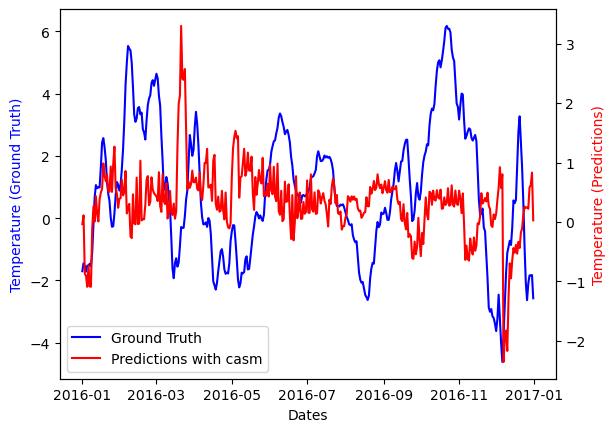

In [35]:
plot_predictions(predictions_without_casm,predictions_with_casm,predictions_with_casm_and_elevation,200,2016,'casm')

      skill  year
0  0.236418  2011
1  0.301575  2012
2  0.049084  2013
3  0.175848  2014
4  0.209028  2015
5  0.221401  2016
6  0.222637  2017       skill  year
0  0.239720  2011
1  0.281754  2012
2  0.032731  2013
3  0.169193  2014
4  0.198797  2015
5  0.203758  2016
6  0.213940  2017


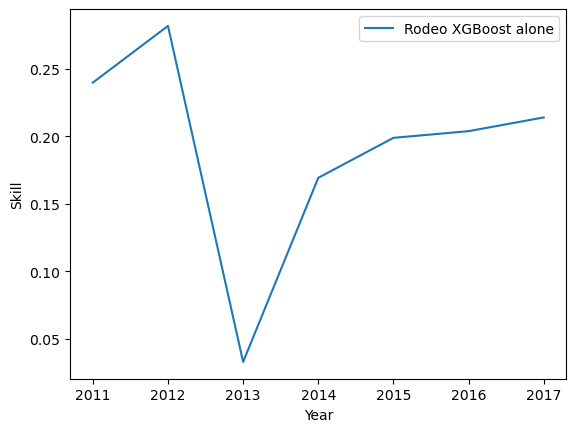

In [9]:
plot='Rodeo XGBoost alone'#'Rodeo XGBoost alone' or 'Rodeo XGBoost vs CASM XGBoost' or 'Rodeo XGBoost vs CFSv2' or 'CASM XGBoost vs CASM and Elevation XGBoost'
show_skills(plot,predictions_with_casm_and_elevation,predictions_with_casm,predictions_without_casm)

<div align="center">
    <h1><strong>Shap values computation</strong></h1>
</div>

In [39]:
features= ['tmp2m_shift43', 'tmp2m_shift43_anom', 'tmp2m_shift86', 'tmp2m_shift86_anom',
                                'rhum_shift44', 'pres_shift44',
                                'nmme_wo_ccsm3_nasa', 'nmme0_wo_ccsm3_nasa','GPP_shift44','RECO_shift44','CASM','elevation'
                      ]
"""
this function contains an intermediate shap values storage which enables not to resume from the beginning if something went
wrong after the first shap values computation. You can find it in /results/shap_values/casm_elevation
"""
shap_values_with_casm_and_elevation=compute_shap_values(data_with_elevation_and_casm,gt_id,target_horizon,features)

import h5py
#these lines store the final shap values used later in /results/shap_values/casm_elevation_good
hdf_directory = 'results/shap_values'

hdf_filename = 'casm_elevation_good.h5'

hdf_filepath = os.path.join(hdf_directory, hdf_filename)

with h5py.File(hdf_filepath, 'w') as hf:
    for year, array in shap_values_with_casm_and_elevation.items():
        hf.create_dataset(str(year), data=array)

Elapsed time for 2011= 151.00100302696228
Elapsed time for 2012= 148.95025992393494
Elapsed time for 2013= 150.65786695480347
Elapsed time for 2014= 149.0282542705536
Elapsed time for 2015= 149.04456734657288
Elapsed time for 2016= 150.55278873443604
Elapsed time for 2017= 150.0229687690735



your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block4_values] [items->Index(['lat', 'lon'], dtype='object')]



Elapsed time= 1788.6493270397186
[[-4.65698421e-01  3.87137502e-01  3.86041522e-01 ... -1.19709445e-03
  -3.54038216e-02  3.83432198e-04]
 [-4.57605422e-01  4.56421435e-01  4.45158571e-01 ...  1.33025707e-04
   2.20676869e-01 -6.74602110e-03]
 [-4.58608031e-01  4.83770043e-01  3.52232605e-01 ... -1.23561756e-03
  -2.99093556e-02 -1.28908949e-02]
 ...
 [ 1.86303449e+00  7.79362023e-01 -1.01548694e-01 ...  2.46894779e-03
   1.62719153e-02 -4.26926851e-01]
 [ 1.24418020e+00  7.59844422e-01 -3.44852775e-01 ...  2.47341301e-03
   1.69235375e-02 -4.05809850e-01]
 [ 1.59814239e+00  1.45943367e+00  2.86171287e-02 ... -3.88612365e-03
   1.76320225e-01 -4.66461271e-01]]
<class 'numpy.ndarray'>
(187610, 12)
2011 is done Elapsed time= 7.418313980102539
[[-3.78252774e-01  5.26561737e-01  4.45618391e-01 ... -1.80539337e-03
  -3.17906141e-02 -1.14592955e-01]
 [-3.74124140e-01  5.20753086e-01  4.41740483e-01 ... -1.80602062e-03
  -3.12532037e-02 -1.14318870e-01]
 [-2.84161121e-01  4.84968394e-01  4.92

In [12]:
shap_values_with_casm_and_elevation=recover_shap_values()

<div align="center">
    <h1><strong>Shap scatter plots</strong></h1>
</div>

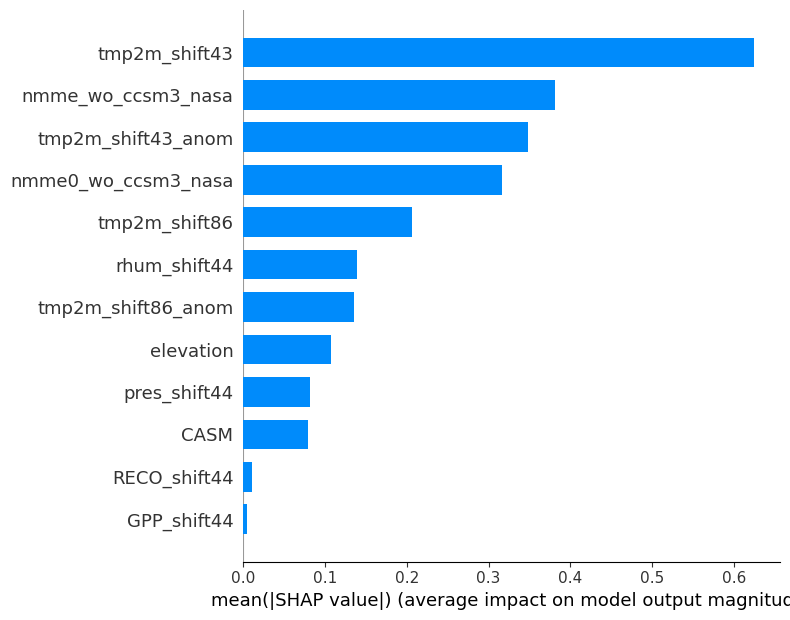

In [13]:
#choose the year for which you want the plot
plot_shap_summary(data_with_elevation_and_casm,shap_values_with_casm_and_elevation[2016],2016)

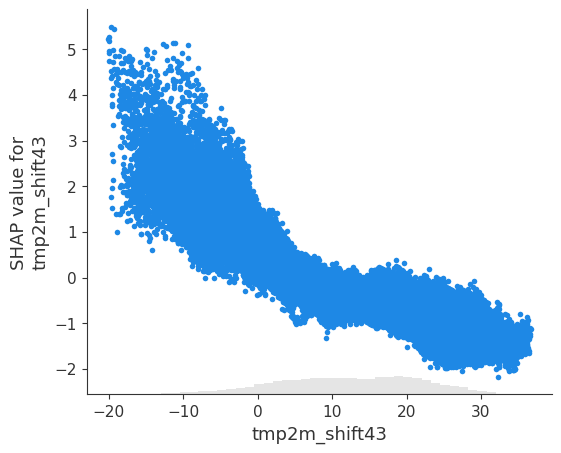

In [14]:
"""
features_names=['tmp2m_shift43', 'tmp2m_shift43_anom', 'tmp2m_shift86', 'tmp2m_shift86_anom',
                                 'rhum_shift44', 'pres_shift44',
                                 'nmme_wo_ccsm3_nasa', 'nmme0_wo_ccsm3_nasa','GPP_shift44','RECO_shift44','CASM','elevation','index','season','day']
"""
#choose the year and the feature you want to plot
plot_shap_scatter(data_with_elevation_and_casm,shap_values_with_casm_and_elevation[2015],2015,0)

<div align="center">
    <h1><strong>SHAP values geographical analysis, per season</strong></h1>
</div>

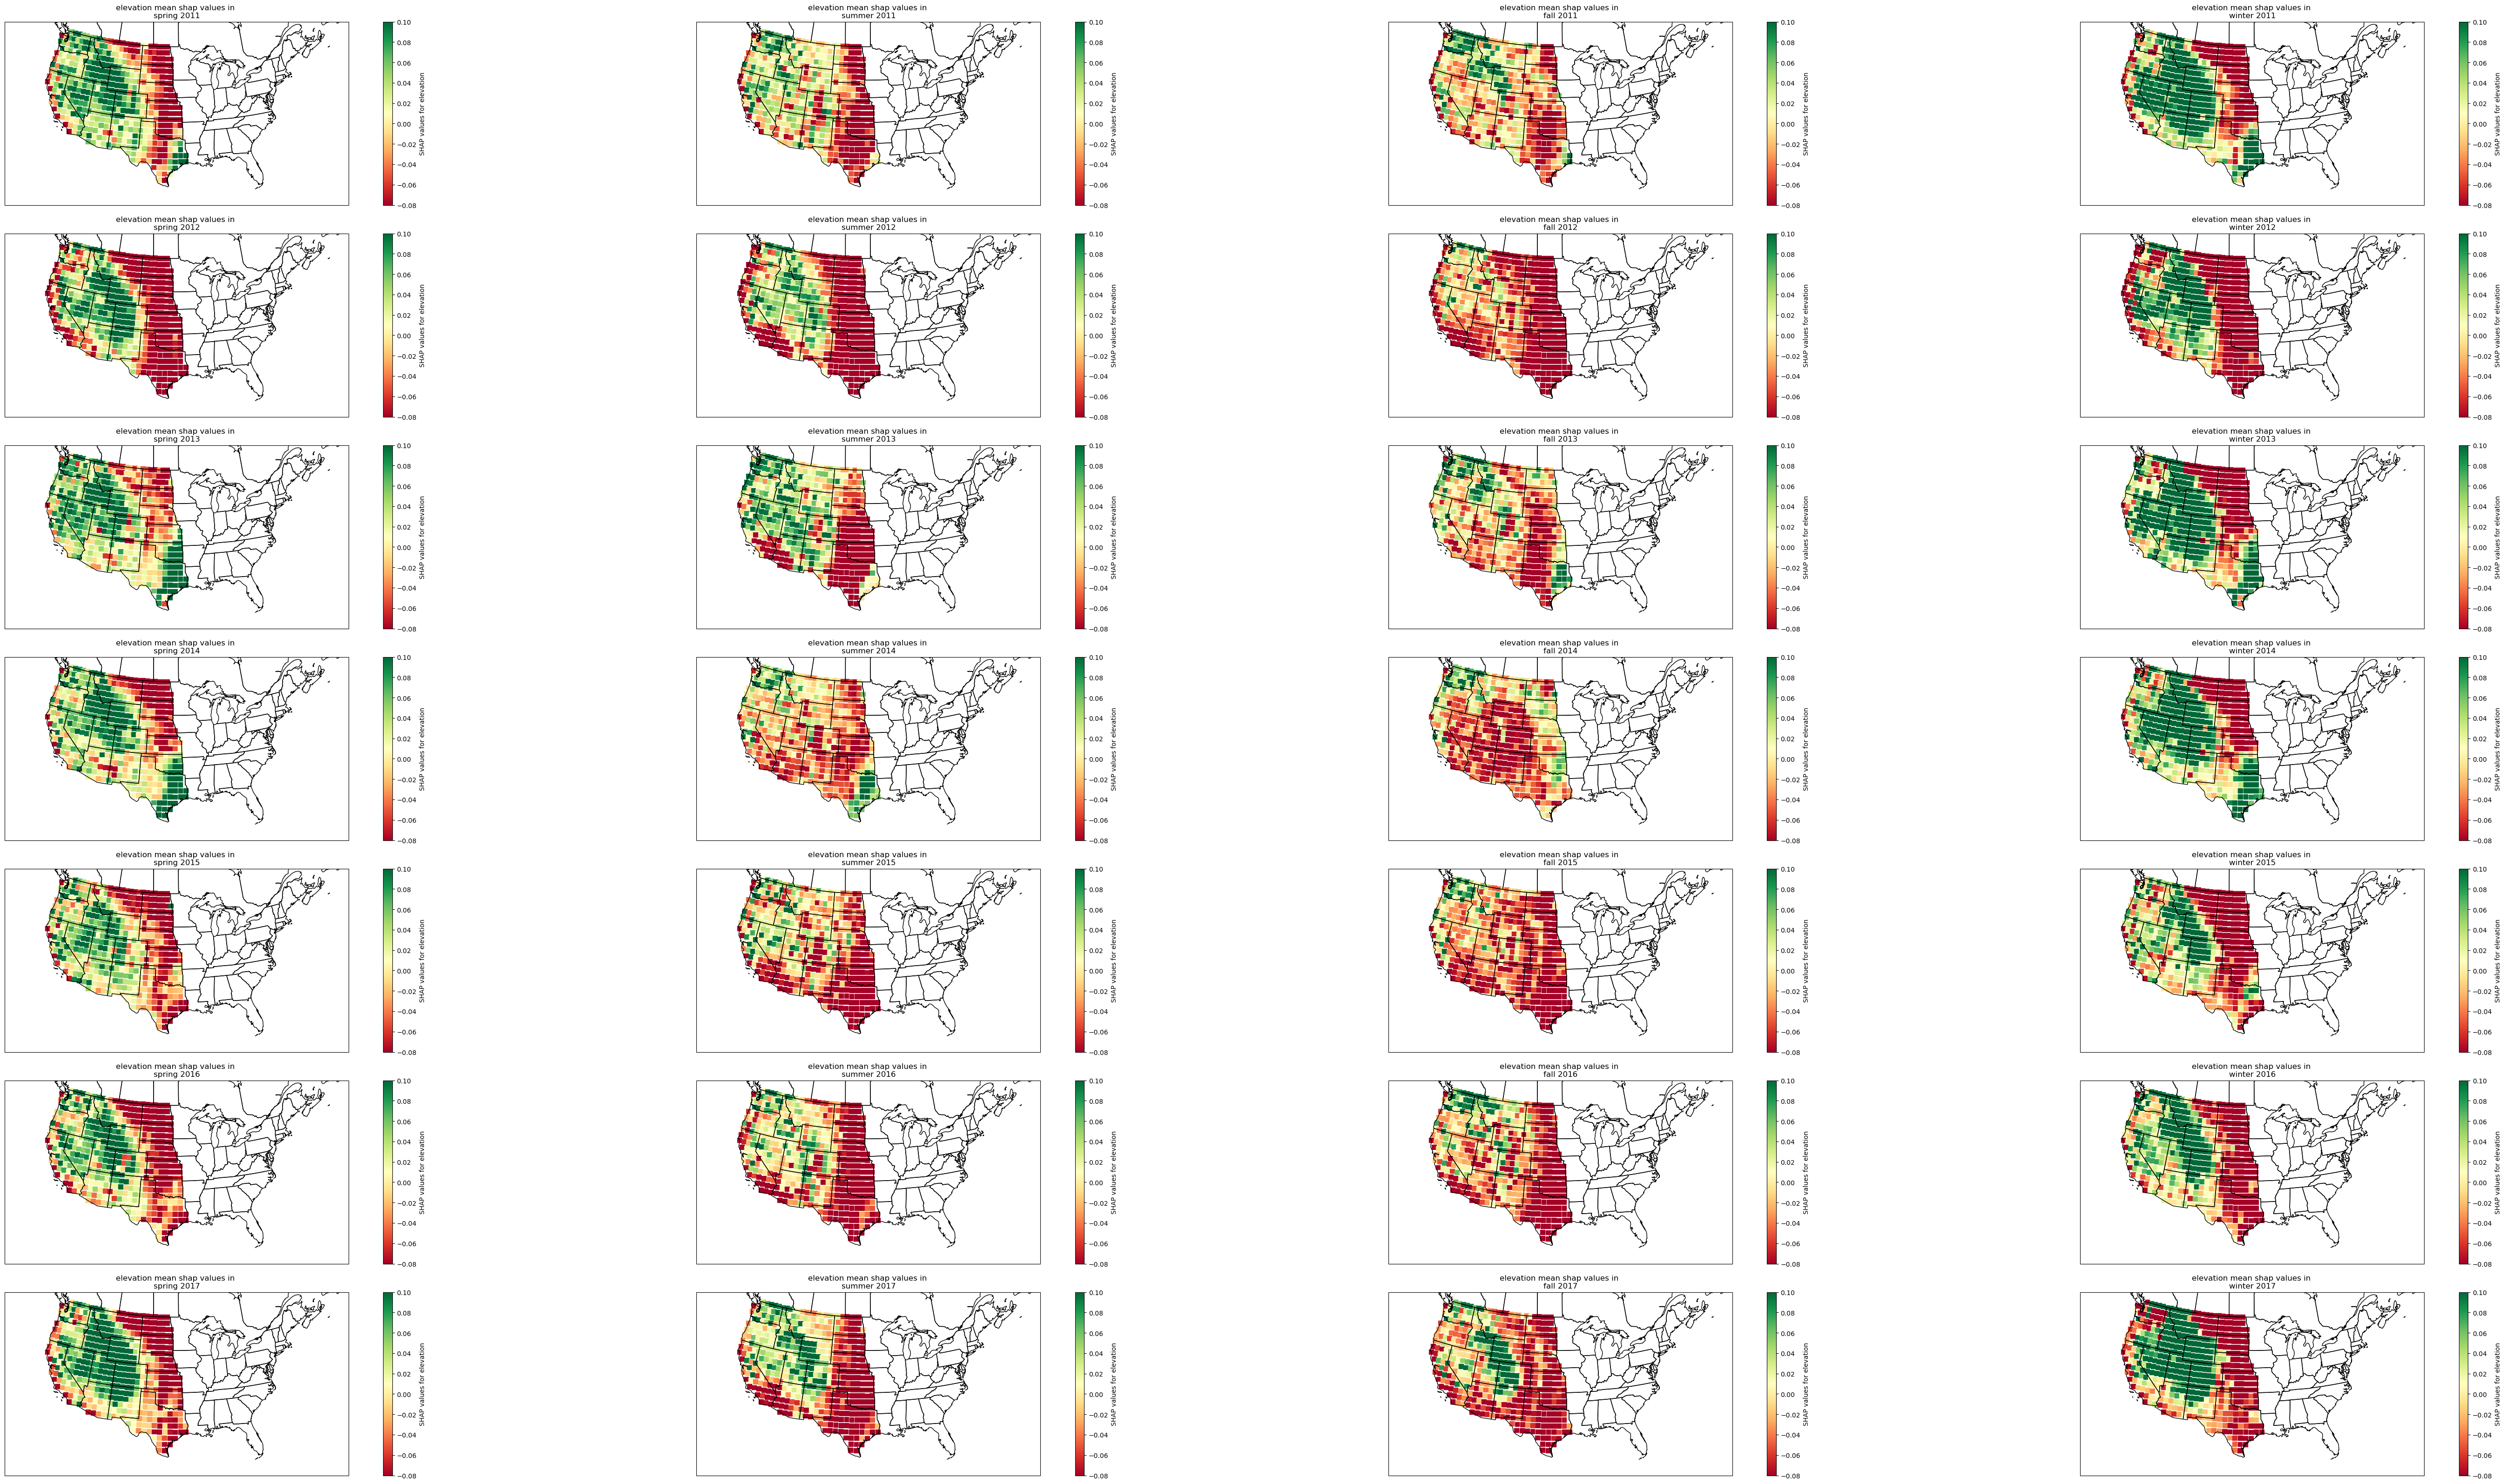

In [17]:
"""
features_names=['tmp2m_shift43', 'tmp2m_shift43_anom', 'tmp2m_shift86', 'tmp2m_shift86_anom',
                                 'rhum_shift44', 'pres_shift44',
                                 'nmme_wo_ccsm3_nasa', 'nmme0_wo_ccsm3_nasa','GPP_shift44','RECO_shift44','CASM','elevation','index','season','day']
"""

shap_geographical_analysis(shap_values_with_casm_and_elevation,11,'elevation')

<div align="center">
    <h1><strong>SHAP values climate regions analysis</strong></h1>
</div>


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


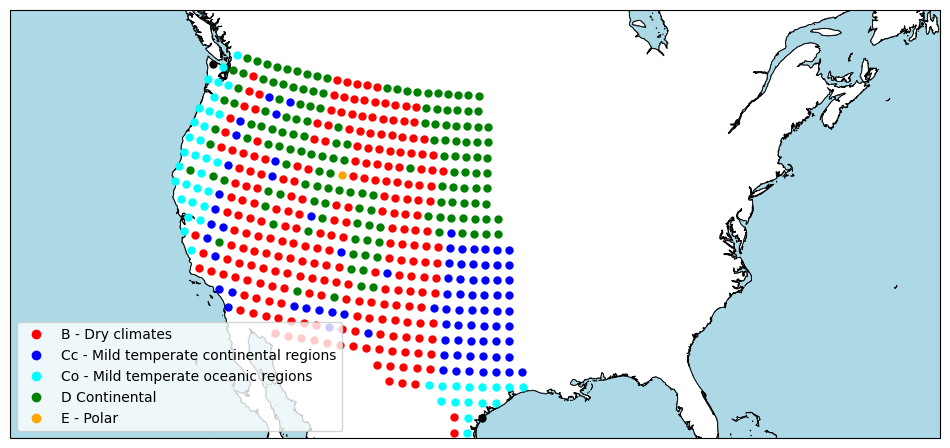

In [28]:
df_climate_zones=plot_climate_regions()


# Shap values per climate regions

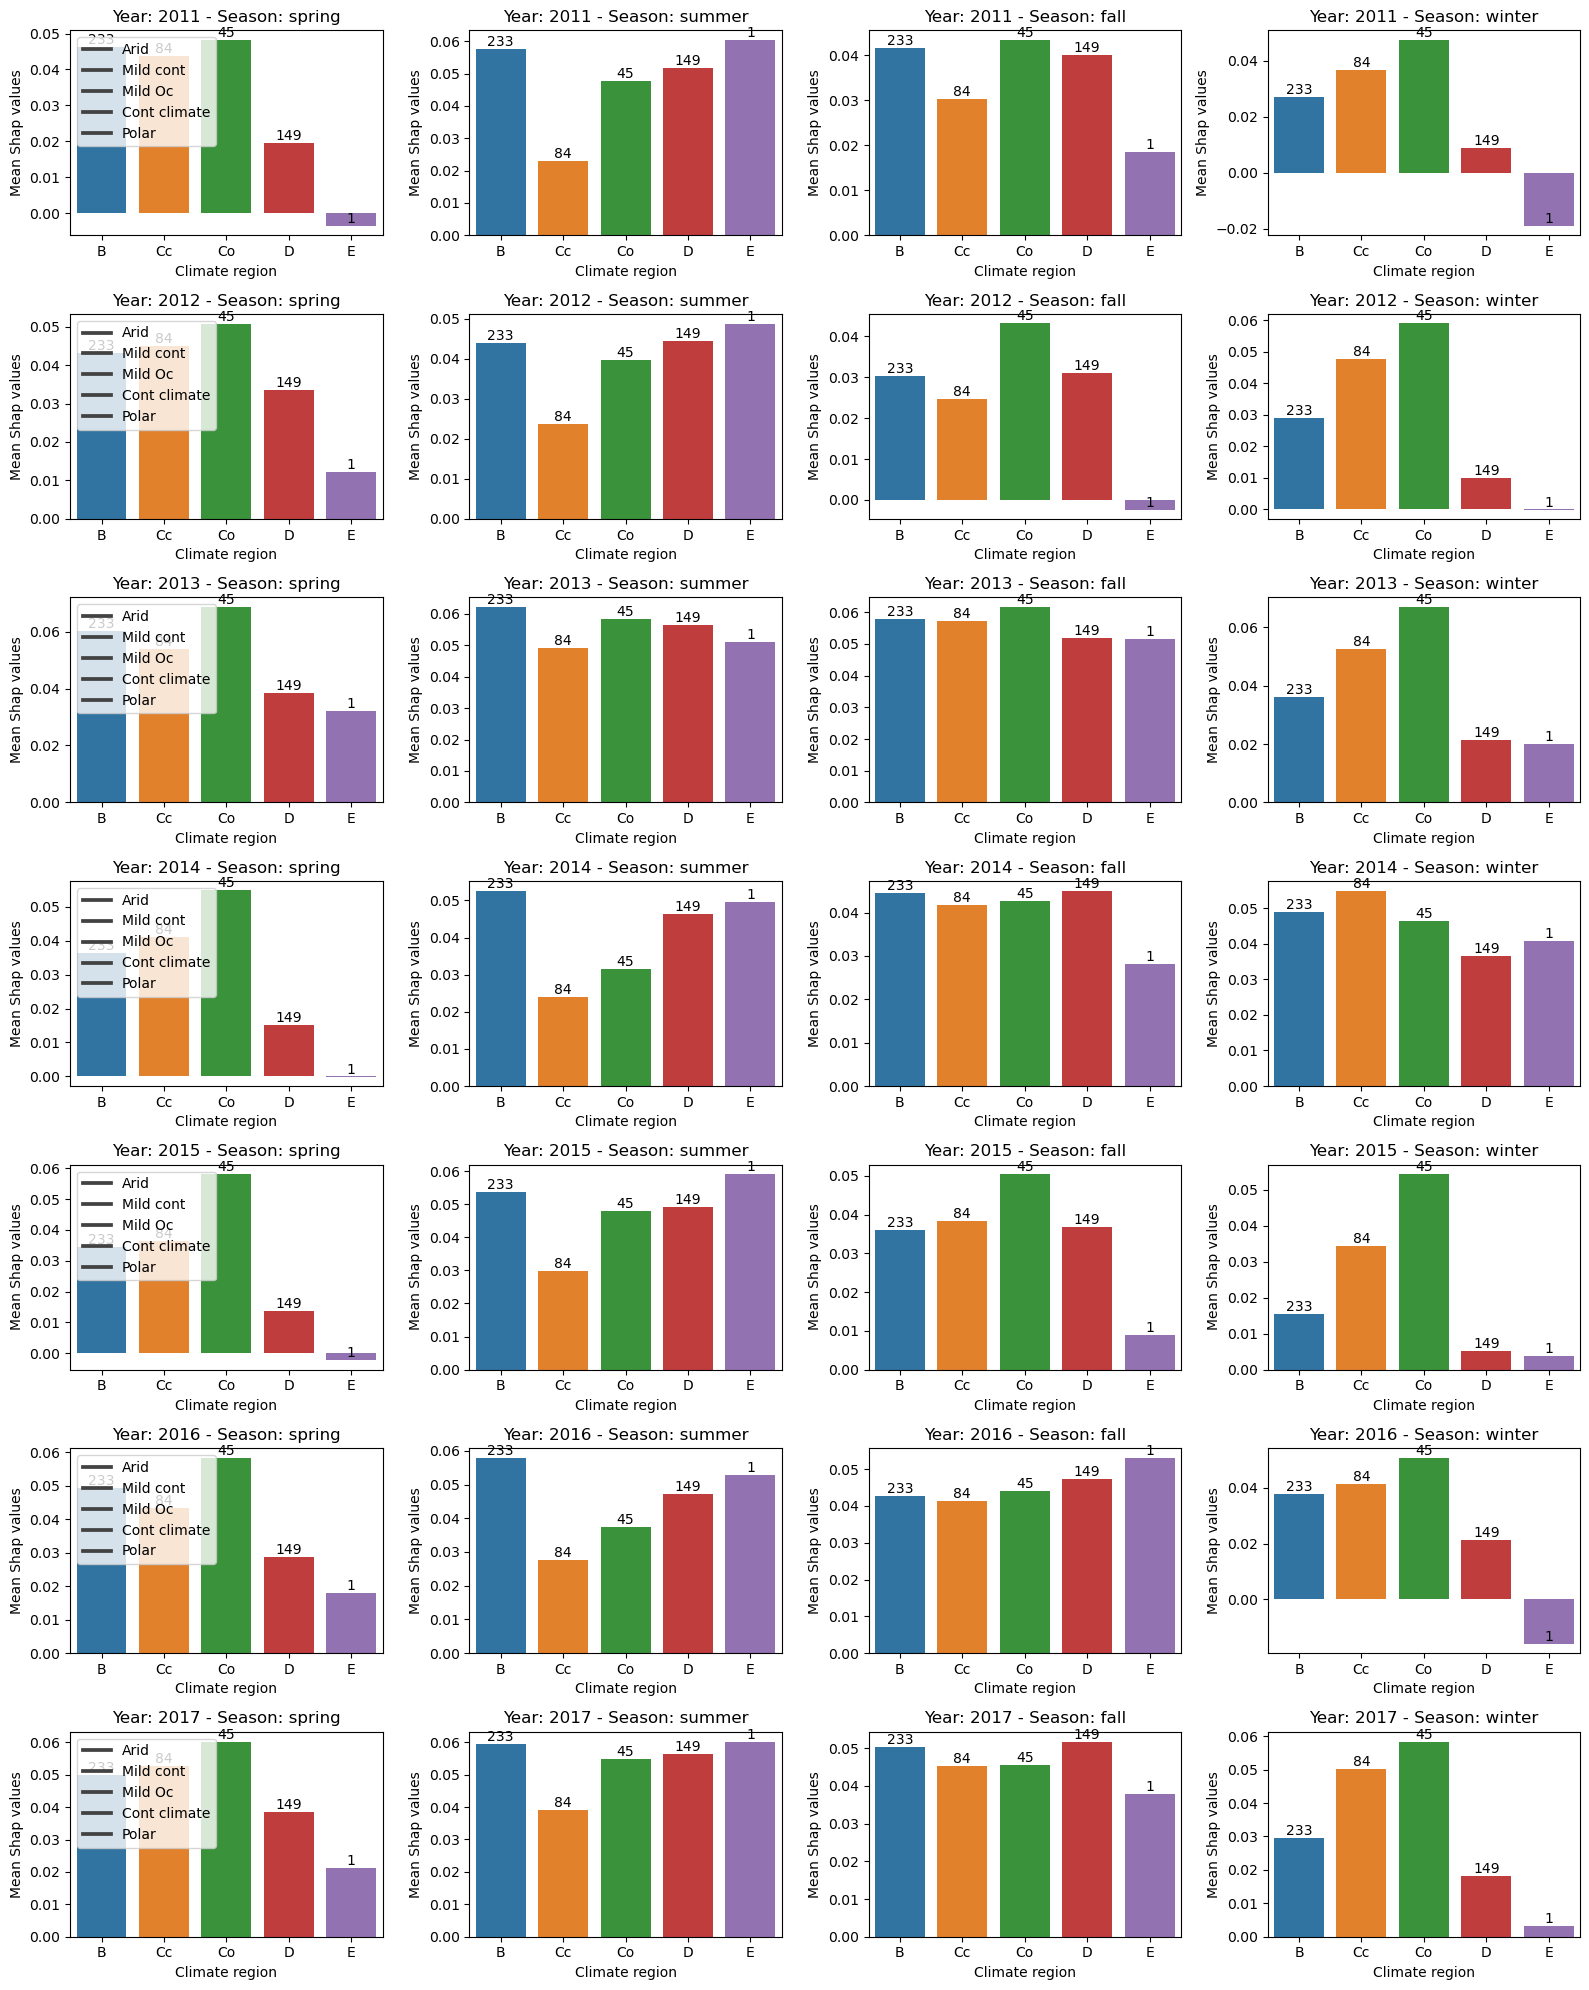

In [30]:
df_climate_zones['Large region'] = df_climate_zones.apply(transform_large_region, axis=1)
plot_mean_shap(shap_values_with_casm_and_elevation,data_with_elevation_and_casm,df_climate_zones,10)

# Seasonal Shap Importance

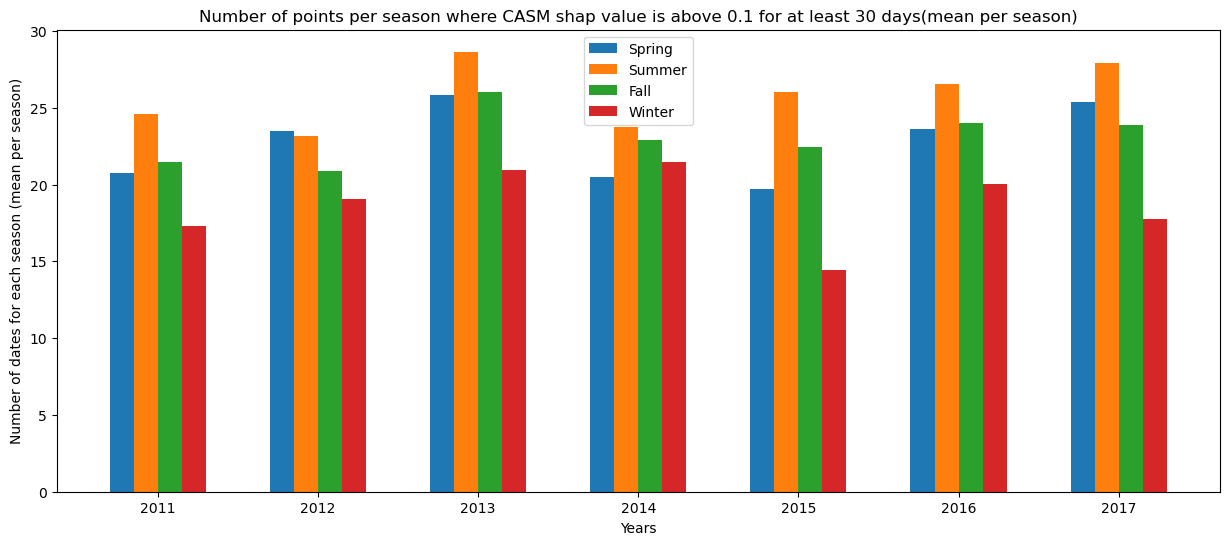

In [98]:
seasonal_shap_importance(shap_values_with_casm_and_elevation,0.1,30)

<div align="center">
    <h1><strong>Skills analysis</strong></h1>
</div>

In [31]:
#this cell only adds 'lat', 'lon' and 'season' columns to our predictions for the following cells
add_lat_lon_season(data_with_casm,predictions_with_casm,predictions_without_casm,predictions_with_casm_and_elevation)

Elapsed time= 643.5097329616547
Elapsed time= 645.8261425495148
Elapsed time= 644.2734544277191
Elapsed time= 649.7424018383026
Elapsed time= 654.5104072093964
Elapsed time= 654.3505787849426
Elapsed time= 650.9236476421356


In [34]:
#this cell enables to keep the predictions, so not to calculate them each time

hdf_directory = 'results/predictions'

hdf_filename = 'rodeo_only_seasons.h5'

hdf_filepath = os.path.join(hdf_directory, hdf_filename)


# Créez un fichier HDF et écrivez les DataFrames en utilisant leurs clés respectives
with pd.HDFStore(hdf_filepath, mode='w') as store:
    for dict_key, dict_value in predictions_without_casm.items():
        str_dict_key=str(dict_key)
        for df_key, df in dict_value.items():
            key = f'{str_dict_key}/{df_key}'
            store[key] = df

hdf_filename = 'rodeo_casm_seasons.h5'
            
hdf_filepath = os.path.join(hdf_directory, hdf_filename)


# Créez un fichier HDF et écrivez les DataFrames en utilisant leurs clés respectives
with pd.HDFStore(hdf_filepath, mode='w') as store:
    for dict_key, dict_value in predictions_with_casm.items():
        str_dict_key=str(dict_key)
        for df_key, df in dict_value.items():
            key = f'{str_dict_key}/{df_key}'
            store[key] = df
            
hdf_filename = 'rodeo_casm_elevation_seasons.h5'
            
hdf_filepath = os.path.join(hdf_directory, hdf_filename)


# Créez un fichier HDF et écrivez les DataFrames en utilisant leurs clés respectives
with pd.HDFStore(hdf_filepath, mode='w') as store:
    for dict_key, dict_value in predictions_with_casm_and_elevation.items():
        str_dict_key=str(dict_key)
        for df_key, df in dict_value.items():
            key = f'{str_dict_key}/{df_key}'
            store[key] = df

object name is not a valid Python identifier: '2011'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though

your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block4_values] [items->Index(['lat', 'lon'], dtype='object')]

object name is not a valid Python identifier: '2012'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though

your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block4_values] [items->Index(['lat', 'lon'], dtype='object')]

object name is not a valid Python identifier: '2013'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming

In [ ]:
#if the predictions have already been computed and stored
predictions_with_casm_and_elevation,predictions_with_casm,predictions_without_casm=recover_predictions_seasons()

In [39]:
df2011,df2012,df2013,df2014,df2015,df2016,df2017=create_dataframes_for_skills_analysis(predictions_with_casm,predictions_without_casm,predictions_with_casm_and_elevation)

In [46]:
#this cell creates one dataframe per year, each dataframe containing the ground truth temperature, the model predictions, the pointwise skills and the skills evolutions
dict_dataframes={2011:df2011,
                 2012:df2012,
                 2013:df2013,
                 2014:df2014,
                 2015:df2015,
                 2016:df2016,
                 2017:df2017
                }
dict_dataframes=compute_pointwise_skills(dict_dataframes)
dict_dataframes=compute_skills_evolutions(dict_dataframes)

Elapsed time= 203.1721158027649
Elapsed time= 202.23031497001648
Elapsed time= 206.24274945259094
Elapsed time= 201.74711537361145
Elapsed time= 202.93387269973755
Elapsed time= 203.16847395896912
Elapsed time= 203.19706773757935


In [110]:
hdf_directory='results/predictions'
hdf_filename = 'dict_dataframes.h5'
            
hdf_filepath = os.path.join(hdf_directory, hdf_filename)
with pd.HDFStore(hdf_filepath, mode='w') as store:
    for year, dataframe in dict_dataframes.items():
        key= f'year_{year}' 
        store.put(key, dataframe)


your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->Index(['lat', 'lon', 'skill with casm', 'skill without casm',
       'skill with casm and elevation', 'skill improvement',
       'skill improvement for casm', 'skill improvement for elevation',
       'Large region'],
      dtype='object')]


your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->Index(['lat', 'lon', 'skill with casm', 'skill without casm',
       'skill with casm and elevation', 'skill improvement',
       'skill improvement for casm', 'skill improvement for elevation',
       'Large region'],
      dtype='object')]


your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->Index(['lat', 'lon', 'skill with casm', 'skill wi

In [112]:
#if the dict_dataframes has already been computed once (a day before for instance)

dict_dataframes=restore_dict_dataframes()


# Skills improvements

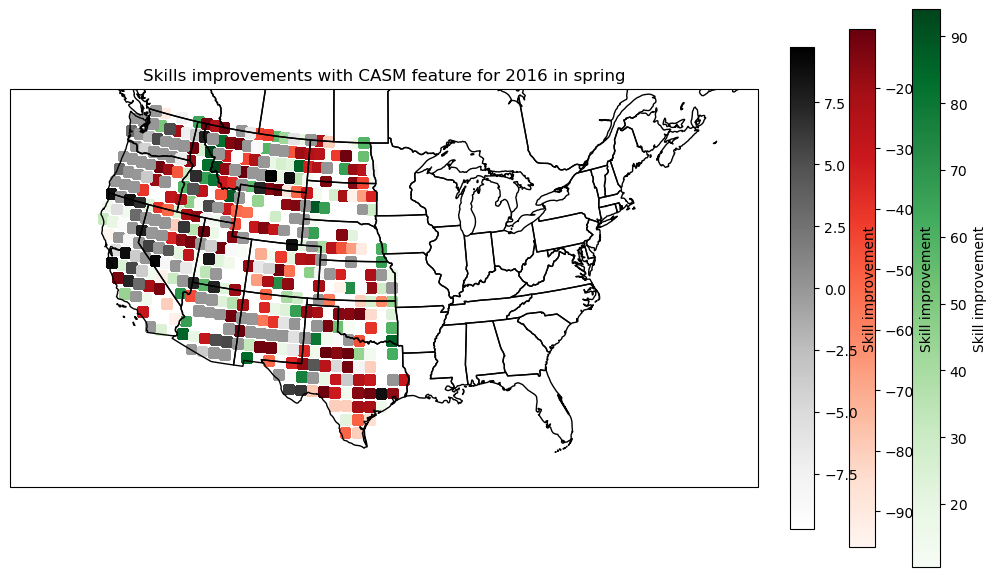

In [100]:
#this function plots the skills improvements after the addition of casm and elevation feature in the model
feature='casm'
plot_skills_improvements(dict_dataframes,1,2016,feature)

# Skills modifications per climate zones

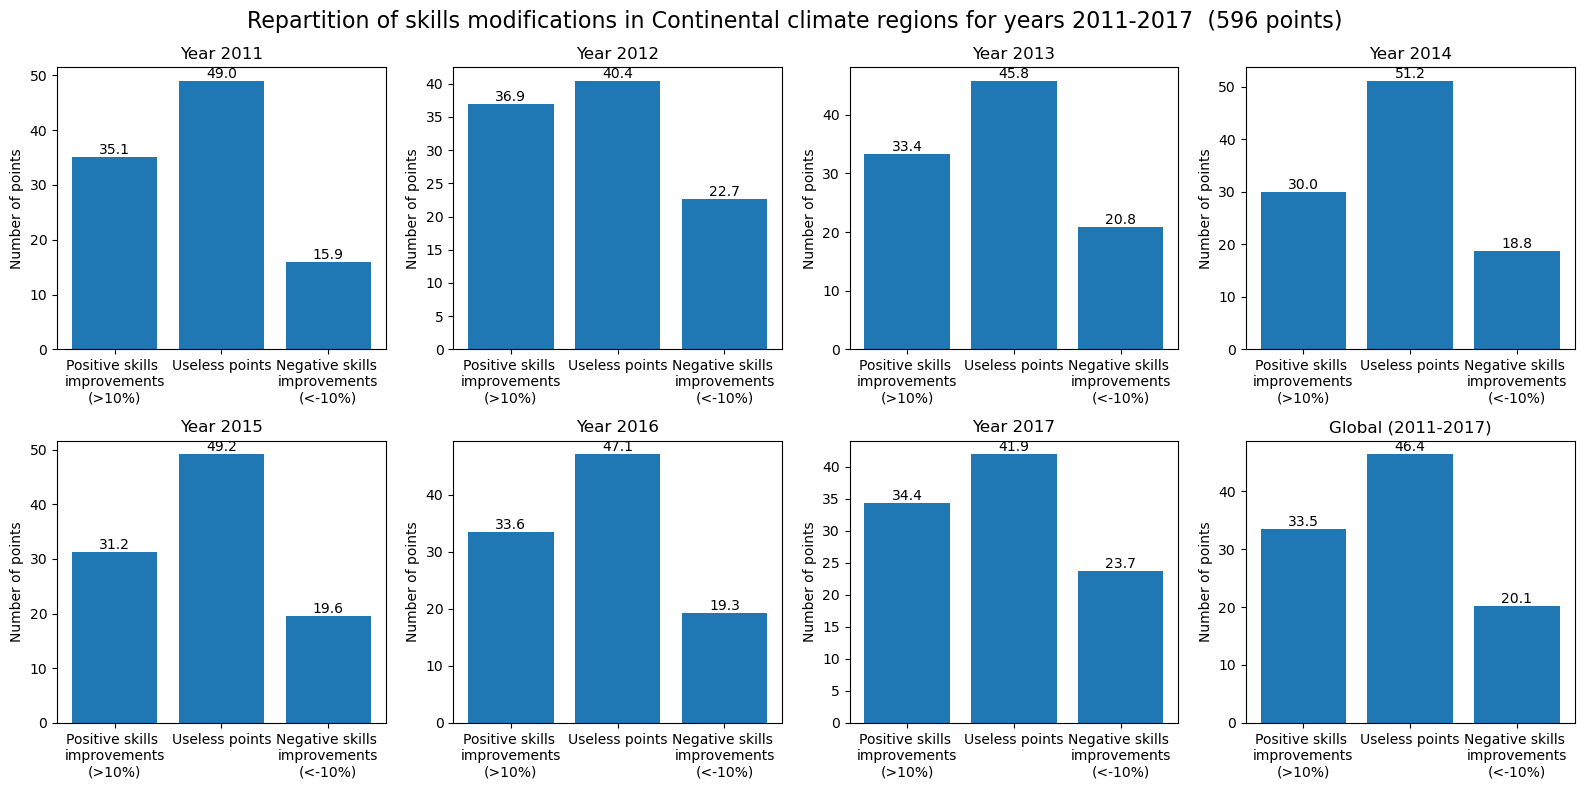

In [87]:
#this cell plots the repartition of the skills modifications according to the area selected
"""
'B': 'Arid regions'
'Cc': 'Mild temperate continental regions'
'Co': 'Mild temperate oceanic regions'
'D': 'Continental climate regions'

"""
area='D'
skills_modifications_bars(dict_dataframes,df_climate_zones,area)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


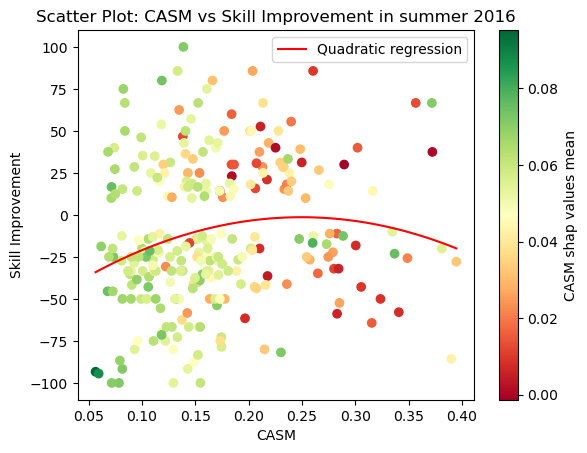

In [106]:
scatter_plot(data_with_elevation_and_casm,dict_dataframes,shap_values_with_casm_and_elevation,2016,2)